In [1]:
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]

In [2]:
import sys

# Keras
if  not 'keras' in installed_packages:
  !pip install keras

# Matplotlib
if  not 'matplotlib' in installed_packages:
  !pip install matplotlib


In [3]:
import matplotlib
# sprawdzamy jego wersje 
print ('Matplotlib version :',matplotlib.__version__)

import tensorflow as tf
print("Tensorflow version :",tf.__version__)

import keras
print("Keras version: ",keras.__version__)

Matplotlib version : 3.1.0
Tensorflow version : 1.13.1
Keras version:  2.2.4


Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Train image: 44666
Train label: 6


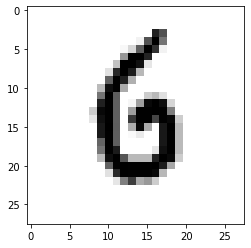

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

import random
# Losowa wartosc miedzy 0-60000
image_num=random.randint(0, 60000)
print("Train image:",image_num)
print("Train label:",train_labels[image_num])
digit=train_images[image_num]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Test image: 9288
Test label: 7


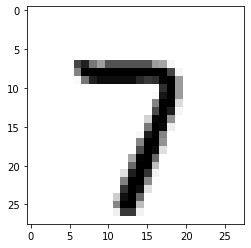

In [12]:
import random
# Losowa wartosc miedzy 0-60000
image_num=random.randint(0, 10000)
print("Test image:",image_num)
print("Test label:",test_labels[image_num])
digit=test_images[image_num]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


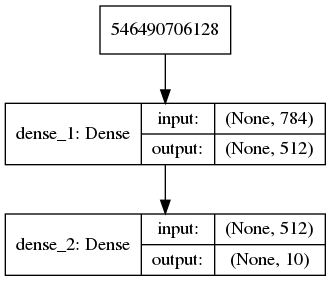

In [14]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(network, to_file='mnist.png', show_shapes=True)
Image('mnist.png')

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 14s 236us/step - loss: 0.2562 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.1045 - acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 10s 170us/step - loss: 0.0695 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.0510 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.0377 - acc: 0.9882


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

# evaluate the model
scores = network.evaluate(test_images, test_labels, verbose=1)
print("%s: %.4f%%" % (network.metrics_names[0], scores[0]))
print("%s: %.4f%%" % (network.metrics_names[1], scores[1]))
 

10000/10000 [==============================] - 2s 168us/step
loss: 0.0708%
acc: 0.9789%


In [20]:
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.9789
test_loss: 0.07079206028417684


#####  based on https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [21]:
from keras.models import Sequential
from keras.layers import Dense
model_json = network.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [23]:
loaded_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# evaluate the model
scores = loaded_model.evaluate(test_images, test_labels, verbose=1)
print("%s: %.4f%%" % (loaded_model.metrics_names[0], scores[0]))
print("%s: %.4f%%" % (loaded_model.metrics_names[1], scores[1]))

10000/10000 [==============================] - 2s 188us/step
loss: 0.0708%
acc: 0.9789%
